In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('TeamData_1990-2018', delimiter='\t')

In [3]:
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,key_0,Tm_x,W,L,W-L%,GB,Abv,Tm_y,#Bat,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Year
0,0,25,Atlanta Braves,65,97,0.401,26.0,ATL,ATL,46,...,0.706,90,2177,101,27,49,31,36,1074,1990
1,1,4,Baltimore Orioles,76,85,0.472,11.5,BAL,BAL,47,...,0.700,99,2002,131,40,72,41,50,1230,1990
2,2,0,Boston Red Sox,88,74,0.543,--,BOS,BOS,43,...,0.739,104,2180,174,28,48,44,59,1233,1990
3,3,10,California Angels,80,82,0.494,23.0,CAL,CAL,43,...,0.720,104,2180,142,28,58,45,41,1202,1990
4,4,17,Chicago Cubs,77,85,0.475,18.0,CHC,CHC,39,...,0.706,87,2194,100,30,61,51,68,1124,1990


In [4]:
df.columns

Index(['Unnamed: 0', 'key_0', 'Tm_x', 'W', 'L', 'W-L%', 'GB', 'Abv', 'Tm_y',
       '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Year'],
      dtype='object')

In [5]:
import missingno as msno
%matplotlib inline
#check for missing values in the df
#msno.matrix(compiled_df.iloc[:,19:])
#msno.matrix(compiled_df.iloc[:,:19])

In [6]:
#reorder columns and drop redundant columns
df = df[['Tm_x','Abv', 'Year', 'W', 'L', 'W-L%', 'GB', 'BatAge', '#Bat', 'G', 'AB', 'PA', 'R', 'R/G',
            'H', '2B', '3B', 'HR', 'RBI', 'TB', 'BA', 'BB', 'OBP', 'SLG', 'OPS', 'OPS+', 'SO', 'SB', 'CS',
            'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB']]

In [7]:
#check for any NaN values
df.isnull().any().sum()

0

In [8]:
df = df.rename(index=str, columns={"Tm_x": "Team", "W-L%": "W/L", '#Bat': 'Num_Hitters', '2B': 'Doubles', '3B': 'Triples', 'OPS+': 'OPS_Plus'})

In [9]:
#create column for hits per game
df['H/G'] = df['H']/df['G']

#create column for extra base hits
df['Extra_Base_Hits'] = df['Doubles']+df['Triples']+df['HR']

#create column for BABIP
df['BABIP'] = (df['H']-df['HR'])/(df['AB'] - df['SO'] - df['HR'] + df['SF'])

In [10]:
#drop rows where year is 1994 due to MLB strike
df = df[df.Year != 1994]

In [11]:
df.BatAge.describe()

count    820.000000
mean      28.760976
std        1.315388
min       25.200000
25%       27.900000
50%       28.600000
75%       29.600000
max       33.500000
Name: BatAge, dtype: float64

In [12]:
df[['R', 'OBP', 'SLG', 'LOB', 'SF']].describe()

,R,OBP,SLG,LOB,SF
count,820.000000,820.000000,820.000000,820.000000,820.000000
mean,740.441463,0.329117,0.412843,1137.043902,45.265854
std,85.351734,0.014702,0.027881,61.389352,9.025540
min,513.000000,0.292000,0.335000,956.000000,24.000000
25%,681.000000,0.320000,0.394000,1095.000000,39.000000
50%,735.000000,0.329000,0.411000,1137.000000,45.000000
75%,794.250000,0.339000,0.432000,1177.250000,51.000000
max,1009.000000,0.373000,0.491000,1312.000000,75.000000


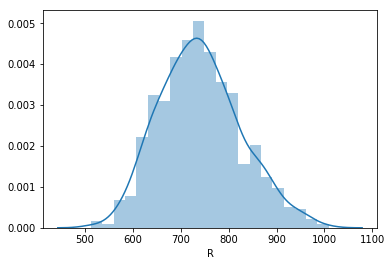

In [13]:
sns.distplot(df['R'])

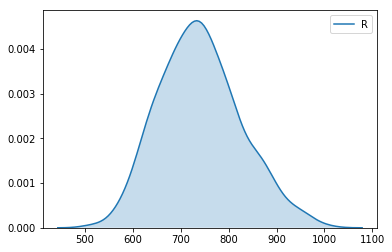

In [14]:
sns.kdeplot(df['R'], shade=True)

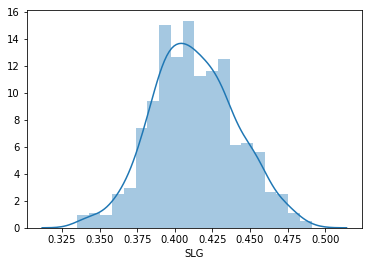

In [15]:
sns.distplot(df['SLG'])

r: 0.8907367447258605


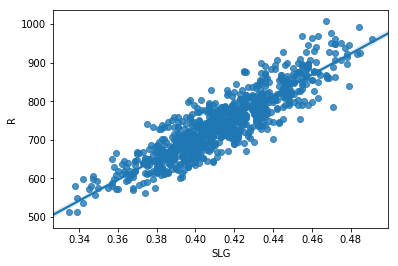

In [16]:
print('r:', df['SLG'].corr(df['R']))
#sns.scatterplot(df['SLG'], df['R'])
sns.regplot(x=df['SLG'], y=df['R'], data=df)

r: 0.8665022377704972


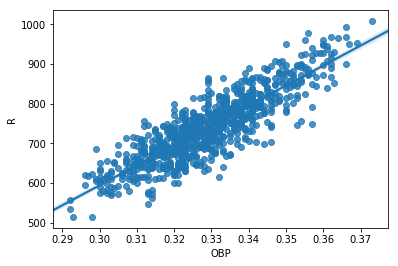

In [17]:
print('r:', df['OBP'].corr(df['R']))
#sns.scatterplot(df['OBP'], df['R'])
sns.regplot(x=df['OBP'], y=df['R'], data=df)

r: 0.5242034479674246


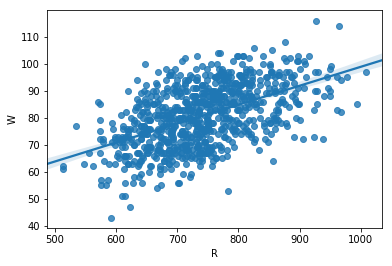

In [18]:
print('r:',df['R'].corr(df['W']))
sns.regplot(x=df['R'], y=df['W'], data=df)
#sns.scatterplot( df['R'], df['W'])

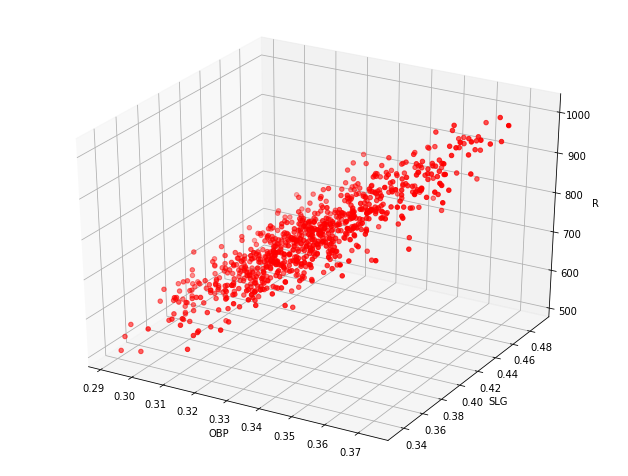

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(11, 8.5)

x = df['OBP']
y = df['SLG']
z = df['R']



ax.scatter(x, y, z, c='r', marker='o')


ax.set_xlabel('OBP')
ax.set_ylabel('SLG')
ax.set_zlabel('R')

plt.show()

In [20]:
model = ols(formula='R~PA+SLG+OBP+SF+LOB', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3488.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:28:39   Log-Likelihood:                -3534.2
No. Observations:                 820   AIC:                             7080.
Df Residuals:                     814   BIC:                             7109.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1697.7770     32.538    -52.179      0.000   -1761.645   -1633.909
PA             0.2348      0.007     31.861      0.000       0.220       0.249
SLG         1019.7231     45.084     22.618      0.000     931.228    1108.218
OBP         3507.0083    106.053     33.069      0.000    3298.839    3715.177
SF             0.4018      0.084      4.794      0.000       0.237       0.566
LOB           -0.5372      0.024    -22.835      0.000      -0.583      -0.491
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.292
Skew:                          -0.037   Prob(JB):                        0.864
Kurtosis:                       2.945   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
def predict_runs_scored(PA, SLG, OBP, SF, LOB):
    return -1697.777 + (0.2348*PA) + (1019.7231*SLG) + (3507.0083*OBP) + (0.4018*SF) + (-0.5372*LOB)

In [22]:
#predict number of runs for 1991 Texas Rangers team 
#actual number of runs = 829
predict_runs_scored(6441, .424, .341, 41, 1187)

821.6396247000001

<b>DOES THE AGE OF A TEAM HELP PREDICT NUMBER OF RUNS SCORED?

In [23]:
df['Age_of_Hitters'] = pd.cut(df.BatAge,4, labels=["Rookies", "Young_Aged", "Avg_Aged", "Vet_Aged"])

In [24]:
model_2 = ols(formula='R~OPS+SLG+Age_of_Hitters', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1304.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:29:38   Log-Likelihood:                -3908.0
No. Observations:                 820   AIC:                             7828.
Df Residuals:                     814   BIC:                             7856.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -834.6497     23.286    -35.843      0.000    -880.357    -788.942
Age_of_Hitters[T.Young_Aged]    -0.0672      3.323     -0.020      0.984      -6.591       6.456
Age_of_Hitters[T.Avg_Aged]      -0.2160      3.701     -0.058      0.953      -7.480       7.048
Age_of_Hitters[T.Vet_Aged]      -6.4685      6.632     -0.975      0.330     -19.486       6.549
OPS                           2663.8165    102.819     25.908      0.000    2461.996    2865.637
SLG                           -971.3848    145.741     -6.665      0.000   -1257.456    -685.313
==============================================================================
Omnibus:                       31.810   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.073
Skew:                          -0.363   Prob(JB):                     2.69e-10
Kurtosis:                       3.874   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model_3 = ols(formula='R~PA+SLG+OBP', data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3159.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:29:51   Log-Likelihood:                -3770.1
No. Observations:                 820   AIC:                             7548.
Df Residuals:                     816   BIC:                             7567.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1305.8066     32.258    -40.480      0.000   -1369.125   -1242.488
PA             0.1121      0.006     18.118      0.000       0.100       0.124
SLG         1629.1794     44.926     36.263      0.000    1540.995    1717.364
OBP         2062.8968     91.193     22.621      0.000    1883.896    2241.897
==============================================================================
Omnibus:                        5.096   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.968
Skew:                           0.167   Prob(JB):                       0.0834
Kurtosis:                       3.184   Cond. No.                     7.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

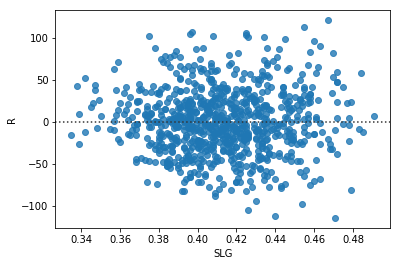

In [26]:
sns.residplot(df['SLG'], df['R'], lowess = False)

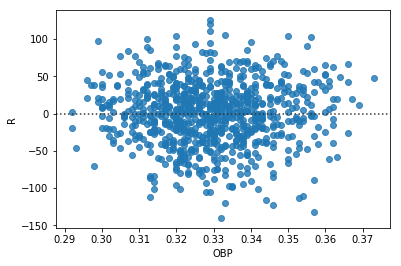

In [27]:
sns.residplot(df['OBP'], df['R'], lowess = False)

<b>TEST DF WITH INTERACTION TERMS

In [29]:
test = df.copy()

In [30]:
test['LOB/SF'] = test.LOB / test.SF

In [31]:
test['LOB/PA'] = test.LOB / test.PA

In [32]:
test['LOB*PA'] = test.LOB * test.PA
test['LOB*SF'] = test.LOB * test.SF

<b><h1>HYPOTHESIS TEST

The New York Yankees have won the most World Series Championships within the span of 1990-2018 <b>(5)</b>. Let's look into how they match up to the rest of the MLB in terms of runs scored.<br><br>
<b> H0: The mean number of runs that the New York Yankees Score == the mean number of runs the rest of the MLB scores<br>
    Ha: The mean number of runs that the New York Yankees Score > the mean number of runs the rest of the MLB scores

In [33]:
yankees_sample = test[test['Abv'] == 'NYY']['R'].mean()
mlb_pop_mean = test['R'].mean()
mlb_pop_std = test['R'].std()

print('Yankees Mean:', yankees_sample)
print('MLB Mean:', mlb_pop_mean)
print('MLB Std:', mlb_pop_std)

Yankees Mean: 821.6785714285714
MLB Mean: 740.4414634146342
MLB Std: 85.35173358055611


In [35]:
z_score = (yankees_sample - mlb_pop_mean) / mlb_pop_std
z_score

0.9517921266035513

In [36]:
model_3 = ols(formula='R~LOB*PA', data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     361.9
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          2.07e-149
Time:                        10:33:05   Log-Likelihood:                -4462.5
No. Observations:                 820   AIC:                             8933.
Df Residuals:                     816   BIC:                             8952.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.509e+04    996.225     15.150      0.000    1.31e+04     1.7e+04
LOB          -15.6643      0.931    -16.821      0.000     -17.492     -13.836
PA            -2.2406      0.159    -14.131      0.000      -2.552      -1.929
LOB:PA         0.0025      0.000     16.674      0.000       0.002       0.003
==============================================================================
Omnibus:                      120.355   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.614
Skew:                           0.761   Prob(JB):                     3.95e-70
Kurtosis:                       5.653   Cond. No.                     3.60e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""